In [1]:
# imports 
from cellpose import io, models, train
import os
import matplotlib.pyplot as plt
import numpy as np
import tifffile

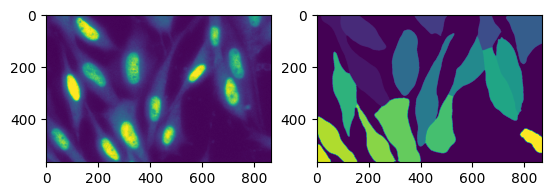

(1476, 1668)

In [16]:
# import data (implement for your own data)
# location = r'\\munsky-nas.engr.colostate.edu\share\Users\Jack\HistoneModification_ScratchAssay\Nuclei Training Tiffs'
location = r'\\munsky-nas.engr.colostate.edu\share\Users\Jack\HistoneModification_ScratchAssay\Cytoplasm Training Tiffs'
list_dir = os.listdir(location)

# npy files are masks, tif are images
tif_locs = sorted([l for l in list_dir if l.endswith('.tif')])
npy_locs = sorted([l for l in list_dir if l.endswith('.npy')]) # this sort is lazy but i think it works

tifs = [tifffile.imread(os.path.join(location, l)) for l in tif_locs]
npys = [np.load(os.path.join(location, l), allow_pickle=True).item() for l in npy_locs]

# display the results 
i = 1
fig, ax = plt.subplots(1, 2)
ax[0].imshow(tifs[i])
ax[1].imshow(npys[i]['masks'])
plt.show()

# divid the data into training and testing data (this data is so small Im gonna do it by hand)
i = 1
images = tifs[:i]
labels = [m['masks'] for m in npys[:i]]

test_images = tifs[i:]
test_labels = [m['masks'] for m in npys[i:]]

# the goal is to get images, labels, test_images, and test_labels all as list[np.arrays]
images[0].shape

In [20]:
# train model 
model = models.CellposeModel(model_type="cyto3")

model_path, train_losses, test_losses = train.train_seg(model.net,
                                                    train_data=images,
                                                    train_labels=labels,
                                                    channels=[0,0],
                                                    normalize=True,
                                                    test_data=test_images, 
                                                    test_labels=test_labels,
                                                    weight_decay=1e-4, 
                                                    SGD=True, 
                                                    learning_rate=0.1,
                                                    n_epochs=150, 
                                                    model_name="histone_cyto")

c:\Users\formanj\GitHub\AngelFISH\.venv\Lib\site-packages\cellpose\resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_l

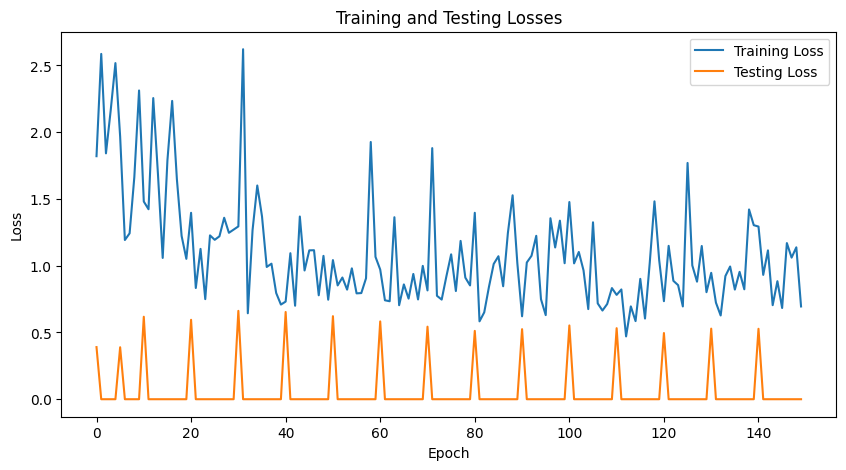

In [21]:
# display losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Losses')
plt.show()
